# Fashion MNIST: classification of fashion images

#### We develop a model that classifies fashion images.

We load the dataset and explore some of its statistics.

In [1]:
import urllib.request
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
url = 'https://firebasestorage.googleapis.com/v0/b/z2tma61d2a74hya815w9x621uszb3a.appspot.com/o/FashionMNIST_dataset.zip?alt=media&token=e013aa17-558d-4e8b-9a30-d51532b6c0d1'
local_zip = 'FashionMNIST_dataset.zip'
urllib.request.urlretrieve(url, local_zip)
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
data_train = pd.read_table('fashion-mnist_train.csv', sep=',')
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
data_train.loc[:,'label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [6]:
data_test = pd.read_table('fashion-mnist_test.csv', sep=',')
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [8]:
data_test.loc[:,'label'].value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

The dataset is well balanced in each class so we procede to the other steps in preparation for training a model.

-----

Here we show some training and testing examples.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

data_train.loc[:,'class_name'] = data_train.loc[:,'label'].apply(lambda x:class_names[x])
data_test.loc[:,'class_name'] = data_test.loc[:,'label'].apply(lambda x:class_names[x])

In [10]:
def plot_examples(data):
    i,j,k = np.random.randint(0,784,3)
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.set_title(data.iloc[i,-1])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.imshow(np.reshape(np.array(data.iloc[i,1:-1].values, dtype='float32'), newshape=(28,28)))
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.set_title(data.iloc[j,-1])
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    ax2.imshow(np.reshape(np.array(data.iloc[j,1:-1].values, dtype='float32'), newshape=(28,28)))
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.set_title(data.iloc[k,-1])
    ax3.set_xticklabels([])
    ax3.set_yticklabels([])
    ax3.imshow(np.reshape(np.array(data.iloc[k,1:-1].values, dtype='float32'), newshape=(28,28)))

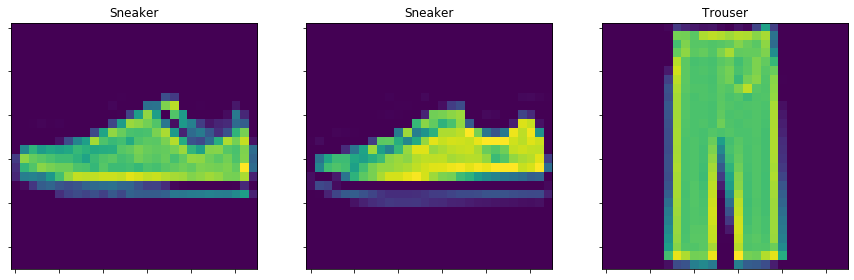

In [11]:
plot_examples(data_train)

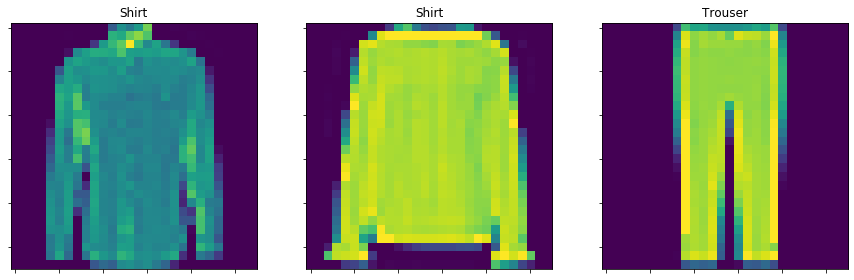

In [12]:
plot_examples(data_test)

-----

Here we define the dataset for training and testing.

In [13]:
X_train = np.array(data_train.iloc[:,1:-1].values, dtype='float32')
Y_train = np.array(np.reshape(np.eye(10)[data_train.iloc[:,[0]]],(-1,10)), dtype='float32')

X_test = np.array(data_test.iloc[:,1:-1].values, dtype='float32')
Y_test = np.array(np.reshape(np.eye(10)[data_test.iloc[:,[0]]],(-1,10)), dtype='float32')

In [14]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

-----

This function shows the training history of the model to see how is performing in every step.

In [15]:
def plot_training(model):
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    accuracy = model.history.history['categorical_accuracy']
    val_accuracy = model.history.history['val_categorical_accuracy']
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_title('LOSS')
    ax1.set_xlabel('iterations')
    ax1.set_ylabel('loss')
    ax1.plot(loss, marker='.', color='#FF00AE', markersize=1, linestyle='-', label='train')
    ax1.plot(val_loss, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='val')
    ax1.legend()
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.set_title('ACCURACY')
    ax2.set_xlabel('iterations')
    ax2.set_ylabel('accuracy')
    ax2.plot(accuracy, marker='.', color='#FF00AE', markersize=1, linestyle='-', label='train')
    ax2.plot(val_accuracy, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='val')
    ax2.legend()

-----

Here we train our first model and evaluate its performance.

In [16]:
def Model_1():
    model = tf.keras.Sequential([   
        tf.keras.layers.Lambda(function=lambda x: x/255.,
                               input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dense(units=64,
                              activation='relu',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros'),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(units=Y_train.shape[1], 
                              activation='softmax',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1,
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    model.summary()
    model.fit(X_train, Y_train, epochs=1000, callbacks=[callback1, callback2], validation_data=(X_test, Y_test))
    return model

In [17]:
model_1 = Model_1()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 2s 41us/sample - loss: 0.7262 - categorical_accuracy: 0.7416 - val_loss: 0.4562 - val_categorical_accuracy: 0.8360
Epoch 2/1000
60000/60000 

60000/60000 [==============================] - 2s 35us/sample - loss: 0.3872 - categorical_accuracy: 0.8542 - val_loss: 0.3560 - val_categorical_accuracy: 0.8734
Epoch 43/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3815 - categorical_accuracy: 0.8564 - val_loss: 0.3583 - val_categorical_accuracy: 0.8807
Epoch 44/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3797 - categorical_accuracy: 0.8568 - val_loss: 0.3583 - val_categorical_accuracy: 0.8800
Epoch 45/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3811 - categorical_accuracy: 0.8567 - val_loss: 0.3486 - val_categorical_accuracy: 0.8808
Epoch 46/1000
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3798 - categorical_accuracy: 0.8561 - val_loss: 0.3510 - val_categorical_accuracy: 0.8798
Epoch 47/1000
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3790 - categorical_accuracy: 0.8566 - val_loss: 

60000/60000 [==============================] - 2s 35us/sample - loss: 0.3542 - categorical_accuracy: 0.8648 - val_loss: 0.3664 - val_categorical_accuracy: 0.8795
Epoch 89/1000
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3579 - categorical_accuracy: 0.8632 - val_loss: 0.3694 - val_categorical_accuracy: 0.8818
Epoch 90/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3506 - categorical_accuracy: 0.8654 - val_loss: 0.3772 - val_categorical_accuracy: 0.8813
Epoch 91/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3545 - categorical_accuracy: 0.8647 - val_loss: 0.3788 - val_categorical_accuracy: 0.8814
Epoch 92/1000
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3543 - categorical_accuracy: 0.8652 - val_loss: 0.3772 - val_categorical_accuracy: 0.8771
Epoch 93/1000
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3525 - categorical_accuracy: 0.8662 - val_loss: 

60000/60000 [==============================] - 2s 34us/sample - loss: 0.3396 - categorical_accuracy: 0.8695 - val_loss: 0.4079 - val_categorical_accuracy: 0.8779
Epoch 135/1000
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3408 - categorical_accuracy: 0.8698 - val_loss: 0.3892 - val_categorical_accuracy: 0.8810
Epoch 136/1000
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3394 - categorical_accuracy: 0.8686 - val_loss: 0.3943 - val_categorical_accuracy: 0.8824
Epoch 137/1000
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3374 - categorical_accuracy: 0.8691 - val_loss: 0.3900 - val_categorical_accuracy: 0.8785
Epoch 138/1000
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3369 - categorical_accuracy: 0.8695 - val_loss: 0.4014 - val_categorical_accuracy: 0.8780
Epoch 139/1000
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3390 - categorical_accuracy: 0.8696 - val_l

60000/60000 [==============================] - 2s 35us/sample - loss: 0.2951 - categorical_accuracy: 0.8855 - val_loss: 0.4230 - val_categorical_accuracy: 0.8813
Epoch 181/1000
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2962 - categorical_accuracy: 0.8840 - val_loss: 0.4233 - val_categorical_accuracy: 0.8816
Epoch 182/1000
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2976 - categorical_accuracy: 0.8843 - val_loss: 0.4241 - val_categorical_accuracy: 0.8817
Epoch 183/1000
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3002 - categorical_accuracy: 0.8848 - val_loss: 0.4185 - val_categorical_accuracy: 0.8836
Epoch 184/1000
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2967 - categorical_accuracy: 0.8845 - val_loss: 0.4225 - val_categorical_accuracy: 0.8826
Epoch 185/1000
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2963 - categorical_accuracy: 0.8844 - val_l

In [18]:
model_1.evaluate(X_train, Y_train)

60000/60000 [==============================] - 1s 20us/sample - loss: 0.1885 - categorical_accuracy: 0.9308


[0.1885366970151663, 0.93081665]

In [19]:
model_1.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.4360 - categorical_accuracy: 0.8802


[0.4359746217131615, 0.8802]

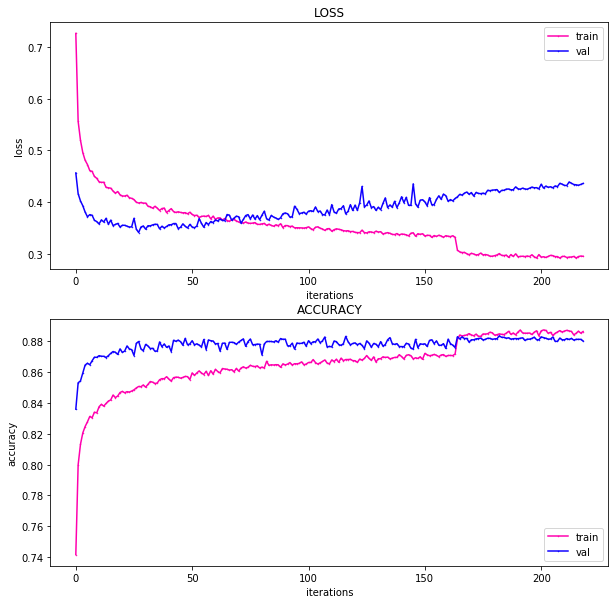

In [20]:
plot_training(model_1)

We see that this model is performing well but it is overfitting so we keep trying with other architectures.

-----

Here we train our second model and evaluate its performance.

In [21]:
def Model_2():
    model = tf.keras.Sequential([   
        tf.keras.layers.Lambda(function=lambda x: x/255.,
                               input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dense(units=64,
                              activation='relu',
                              kernel_initializer='he_uniform',
                              bias_initializer='zeros'),
        tf.keras.layers.Dense(units=64,
                              activation='relu',
                               kernel_initializer='he_uniform',
                           bias_initializer='zeros'),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(units=Y_train.shape[1], 
                              activation='softmax',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1,
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    model.summary()
    model.fit(X_train, Y_train, epochs=1000, callbacks=[callback1, callback2], validation_data=(X_test, Y_test))
    return model

In [22]:
model_2 = Model_2()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 3s 43u

60000/60000 [==============================] - 2s 36us/sample - loss: 0.2281 - categorical_accuracy: 0.9144 - val_loss: 0.3836 - val_categorical_accuracy: 0.8877
Epoch 42/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2316 - categorical_accuracy: 0.9143 - val_loss: 0.3859 - val_categorical_accuracy: 0.8880
Epoch 43/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2265 - categorical_accuracy: 0.9149 - val_loss: 0.3904 - val_categorical_accuracy: 0.8880
Epoch 44/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2280 - categorical_accuracy: 0.9152 - val_loss: 0.3921 - val_categorical_accuracy: 0.8873
Epoch 45/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2256 - categorical_accuracy: 0.9144 - val_loss: 0.3742 - val_categorical_accuracy: 0.8916
Epoch 46/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2246 - categorical_accuracy: 0.9168 - val_loss: 

60000/60000 [==============================] - 2s 39us/sample - loss: 0.1855 - categorical_accuracy: 0.9297 - val_loss: 0.5185 - val_categorical_accuracy: 0.8861
Epoch 88/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1850 - categorical_accuracy: 0.9291 - val_loss: 0.5371 - val_categorical_accuracy: 0.8884
Epoch 89/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1859 - categorical_accuracy: 0.9289 - val_loss: 0.5490 - val_categorical_accuracy: 0.8862
Epoch 90/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1805 - categorical_accuracy: 0.9294 - val_loss: 0.5208 - val_categorical_accuracy: 0.8874
Epoch 91/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1826 - categorical_accuracy: 0.9313 - val_loss: 0.5561 - val_categorical_accuracy: 0.8860
Epoch 92/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1828 - categorical_accuracy: 0.9286 - val_loss: 

60000/60000 [==============================] - 2s 37us/sample - loss: 0.1620 - categorical_accuracy: 0.9383 - val_loss: 0.6466 - val_categorical_accuracy: 0.8820
Epoch 134/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1627 - categorical_accuracy: 0.9361 - val_loss: 0.6136 - val_categorical_accuracy: 0.8870
Epoch 135/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1619 - categorical_accuracy: 0.9384 - val_loss: 0.6244 - val_categorical_accuracy: 0.8850
Epoch 136/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1644 - categorical_accuracy: 0.9363 - val_loss: 0.6323 - val_categorical_accuracy: 0.8840
Epoch 137/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1289 - categorical_accuracy: 0.9488 - val_loss: 0.6379 - val_categorical_accuracy: 0.8908
Epoch 138/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1229 - categorical_accuracy: 0.9517 - val_l

60000/60000 [==============================] - 2s 40us/sample - loss: 0.1082 - categorical_accuracy: 0.9565 - val_loss: 0.8409 - val_categorical_accuracy: 0.8853
Epoch 180/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1076 - categorical_accuracy: 0.9567 - val_loss: 0.8487 - val_categorical_accuracy: 0.8868
Epoch 181/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1060 - categorical_accuracy: 0.9572 - val_loss: 0.8609 - val_categorical_accuracy: 0.8870
Epoch 182/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1081 - categorical_accuracy: 0.9566 - val_loss: 0.8477 - val_categorical_accuracy: 0.8857
Epoch 183/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1056 - categorical_accuracy: 0.9572 - val_loss: 0.8574 - val_categorical_accuracy: 0.8872
Epoch 184/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1053 - categorical_accuracy: 0.9572 - val_l

60000/60000 [==============================] - 3s 42us/sample - loss: 0.0982 - categorical_accuracy: 0.9603 - val_loss: 0.9691 - val_categorical_accuracy: 0.8858
Epoch 226/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0979 - categorical_accuracy: 0.9599 - val_loss: 0.9732 - val_categorical_accuracy: 0.8867
Epoch 227/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0985 - categorical_accuracy: 0.9603 - val_loss: 0.9853 - val_categorical_accuracy: 0.8849
Epoch 228/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0974 - categorical_accuracy: 0.9603 - val_loss: 0.9867 - val_categorical_accuracy: 0.8845
Epoch 229/1000
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0991 - categorical_accuracy: 0.9600 - val_loss: 0.9834 - val_categorical_accuracy: 0.8861
Epoch 230/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0976 - categorical_accuracy: 0.9592 - val_l

60000/60000 [==============================] - 2s 39us/sample - loss: 0.0941 - categorical_accuracy: 0.9609 - val_loss: 1.0693 - val_categorical_accuracy: 0.8831
Epoch 272/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0936 - categorical_accuracy: 0.9613 - val_loss: 1.0894 - val_categorical_accuracy: 0.8853
Epoch 273/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0926 - categorical_accuracy: 0.9616 - val_loss: 1.0887 - val_categorical_accuracy: 0.8837
Epoch 274/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0943 - categorical_accuracy: 0.9615 - val_loss: 1.0855 - val_categorical_accuracy: 0.8842
Epoch 275/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0933 - categorical_accuracy: 0.9620 - val_loss: 1.0948 - val_categorical_accuracy: 0.8826
Epoch 276/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0940 - categorical_accuracy: 0.9615 - val_l

60000/60000 [==============================] - 2s 38us/sample - loss: 0.0891 - categorical_accuracy: 0.9630 - val_loss: 1.2109 - val_categorical_accuracy: 0.8842
Epoch 318/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0887 - categorical_accuracy: 0.9631 - val_loss: 1.2027 - val_categorical_accuracy: 0.8846
Epoch 319/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0885 - categorical_accuracy: 0.9626 - val_loss: 1.2109 - val_categorical_accuracy: 0.8839
Epoch 320/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0886 - categorical_accuracy: 0.9636 - val_loss: 1.1893 - val_categorical_accuracy: 0.8831
Epoch 321/1000
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0887 - categorical_accuracy: 0.9627 - val_loss: 1.2256 - val_categorical_accuracy: 0.8839
Epoch 322/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0888 - categorical_accuracy: 0.9628 - val_l

In [23]:
model_2.evaluate(X_train, Y_train)

60000/60000 [==============================] - 1s 21us/sample - loss: 0.0661 - categorical_accuracy: 0.9714


[0.06608635652473556, 0.9714]

In [24]:
model_2.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 1.3159 - categorical_accuracy: 0.8830


[1.315931296958751, 0.883]

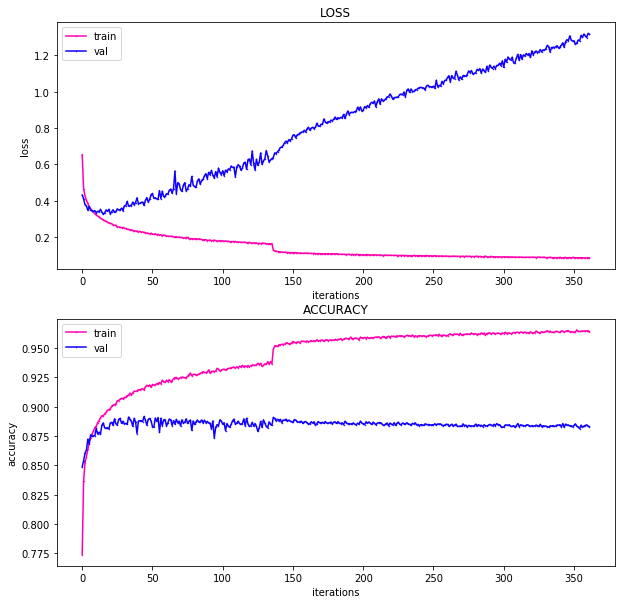

In [25]:
plot_training(model_2)

We see that this model is performing worse and it is also overfitting so we discard it. We keep trying with other architectures.

-----

Here we train our third model and evaluate its performance.

In [26]:
def Model_3():
    model = tf.keras.Sequential([   
        tf.keras.layers.Lambda(function=lambda x: x/255.,
                               input_shape=[X_train.shape[1]]),
        tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3, 3),
                               strides=(1, 1),
                               padding='valid',
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                     strides=(2, 2),
                                     padding='valid'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(units=64,
                              activation='relu',
                               kernel_initializer='he_uniform',
                           bias_initializer='zeros'),
        tf.keras.layers.Dense(units=Y_train.shape[1], 
                              activation='softmax',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1,
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    model.summary()
    model.fit(X_train, Y_train, epochs=1000, callbacks=[callback1, callback2], validation_data=(X_test, Y_test))
    return model

In [27]:
model_3 = Model_3()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10816)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

Epoch 39/1000
60000/60000 [==============================] - 18s 306us/sample - loss: 0.0734 - categorical_accuracy: 0.9725 - val_loss: 0.3365 - val_categorical_accuracy: 0.9200
Epoch 40/1000
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0715 - categorical_accuracy: 0.9735 - val_loss: 0.3456 - val_categorical_accuracy: 0.9228
Epoch 41/1000
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0715 - categorical_accuracy: 0.9728 - val_loss: 0.3175 - val_categorical_accuracy: 0.9245
Epoch 42/1000
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0675 - categorical_accuracy: 0.9746 - val_loss: 0.3354 - val_categorical_accuracy: 0.9238
Epoch 43/1000
60000/60000 [==============================] - 18s 306us/sample - loss: 0.0689 - categorical_accuracy: 0.9746 - val_loss: 0.3444 - val_categorical_accuracy: 0.9223
Epoch 44/1000
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0680 - categorical_acc

60000/60000 [==============================] - 19s 309us/sample - loss: 0.0471 - categorical_accuracy: 0.9828 - val_loss: 0.4319 - val_categorical_accuracy: 0.9228
Epoch 86/1000
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0461 - categorical_accuracy: 0.9840 - val_loss: 0.4456 - val_categorical_accuracy: 0.9208
Epoch 87/1000
60000/60000 [==============================] - 18s 308us/sample - loss: 0.0448 - categorical_accuracy: 0.9848 - val_loss: 0.4556 - val_categorical_accuracy: 0.9209
Epoch 88/1000
60000/60000 [==============================] - 18s 308us/sample - loss: 0.0447 - categorical_accuracy: 0.9840 - val_loss: 0.4436 - val_categorical_accuracy: 0.9224
Epoch 89/1000
60000/60000 [==============================] - 19s 312us/sample - loss: 0.0453 - categorical_accuracy: 0.9836 - val_loss: 0.4523 - val_categorical_accuracy: 0.9174
Epoch 90/1000
60000/60000 [==============================] - 19s 310us/sample - loss: 0.0456 - categorical_accuracy: 0.9837 

Epoch 131/1000
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0193 - categorical_accuracy: 0.9931 - val_loss: 0.4860 - val_categorical_accuracy: 0.9262
Epoch 132/1000
60000/60000 [==============================] - 18s 308us/sample - loss: 0.0189 - categorical_accuracy: 0.9934 - val_loss: 0.4908 - val_categorical_accuracy: 0.9264
Epoch 133/1000
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0193 - categorical_accuracy: 0.9938 - val_loss: 0.4875 - val_categorical_accuracy: 0.9255
Epoch 134/1000
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0176 - categorical_accuracy: 0.9939 - val_loss: 0.4910 - val_categorical_accuracy: 0.9257
Epoch 135/1000
60000/60000 [==============================] - 18s 308us/sample - loss: 0.0184 - categorical_accuracy: 0.9937 - val_loss: 0.4954 - val_categorical_accuracy: 0.9258
Epoch 136/1000
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0204 - categoric

Epoch 177/1000
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0170 - categorical_accuracy: 0.9941 - val_loss: 0.5103 - val_categorical_accuracy: 0.9254
Epoch 178/1000
60000/60000 [==============================] - 18s 308us/sample - loss: 0.0152 - categorical_accuracy: 0.9947 - val_loss: 0.5119 - val_categorical_accuracy: 0.9262
Epoch 179/1000
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0145 - categorical_accuracy: 0.9954 - val_loss: 0.5128 - val_categorical_accuracy: 0.9260
Epoch 180/1000
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0154 - categorical_accuracy: 0.9946 - val_loss: 0.5195 - val_categorical_accuracy: 0.9266
Epoch 181/1000
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0150 - categorical_accuracy: 0.9949 - val_loss: 0.5161 - val_categorical_accuracy: 0.9254
Epoch 182/1000
60000/60000 [==============================] - 19s 312us/sample - loss: 0.0151 - categoric

In [28]:
model_3.evaluate(X_train, Y_train)

60000/60000 [==============================] - 4s 65us/sample - loss: 8.0364e-04 - categorical_accuracy: 0.9999


[0.0008036359940859863, 0.99993336]

In [29]:
model_3.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.5360 - categorical_accuracy: 0.9259


[0.5359596041304351, 0.9259]

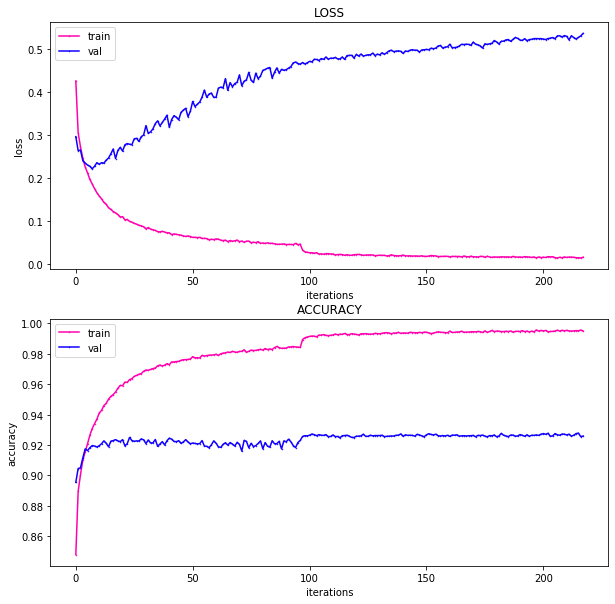

In [30]:
plot_training(model_3)

#### We see that the last model is the best one, but overfitting is present so additional exploration of hyperparameters would be necessary to make a final conclusion.